In [1]:
import numpy as np
import pandas as pd
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from IPython.core.display import HTML
from sklearn.tree import export_text
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
import numpy as np
import pandas as pd
from io import StringIO 
import graphviz 
import pydotplus
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
dataset = pd.read_csv('./data/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# ищем пропуски
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

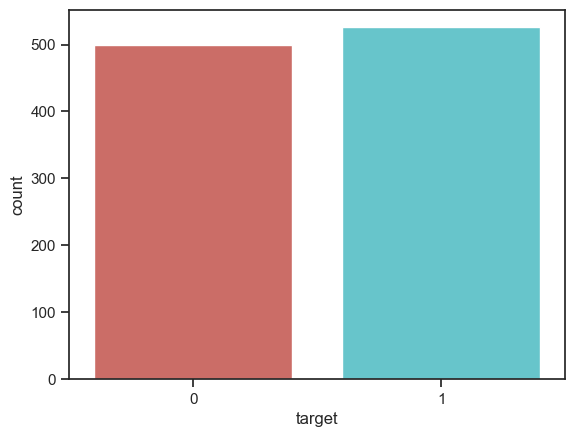

In [5]:
sns.countplot(x='target', data=dataset, palette='hls')
plt.show()

In [6]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [7]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_train_logreg = logreg.predict(X_train)
ac1 = accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)
ac1

c:\Users\nagor\Desktop\семестр\ТМО\ML-6sem\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8426829268292683, 0.8048780487804879)

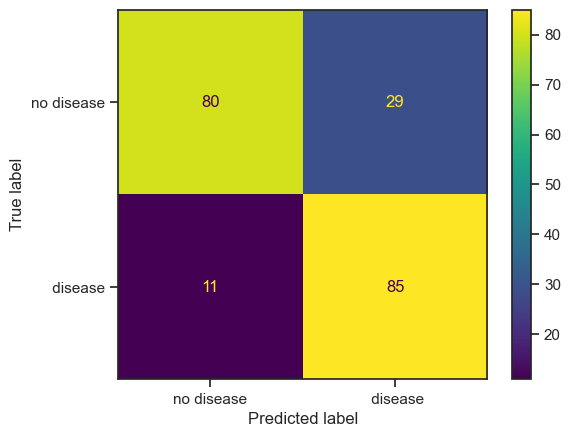

In [9]:
cm1 = confusion_matrix(y_test, y_pred_test_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['no disease', ' disease'])
disp.plot()

In [10]:
svc = SVC(kernel='rbf') # (0.7097560975609756, 0.697560975609756)
#svc = SVC(kernel='sigmoid') # (0.5292682926829269, 0.5658536585365853)
#svc = SVC(kernel='poly') # (0.6963414634146341, 0.7073170731707317)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
ac2 = accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)
ac2

(0.7097560975609756, 0.697560975609756)

In [11]:
param_grid = {'degree': [1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'kernel':['rbf']}
grid = GridSearchCV(SVC(), param_grid, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ...............................degree=1, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=1, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=1, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=1, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=1, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=2, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=2, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=2, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=2, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=2, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............................degree=3

{'degree': 1, 'kernel': 'rbf'}

In [12]:
svc = SVC(kernel='rbf', degree=1)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)

(0.7097560975609756, 0.697560975609756)

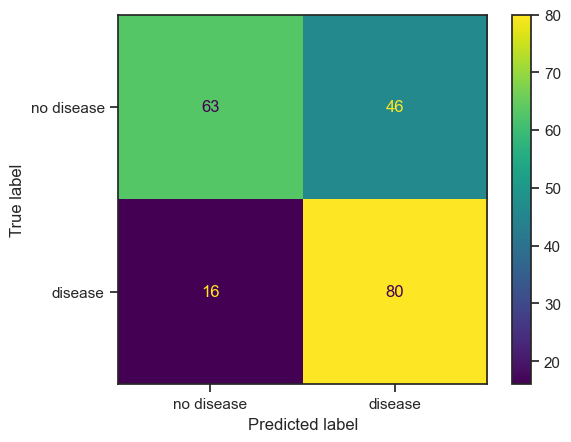

In [13]:
cm2 = confusion_matrix(y_test, y_pred_test_svc, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['no disease', 'disease'])
disp.plot()

In [14]:
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
ac3 = accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree)
ac3

(1.0, 1.0)

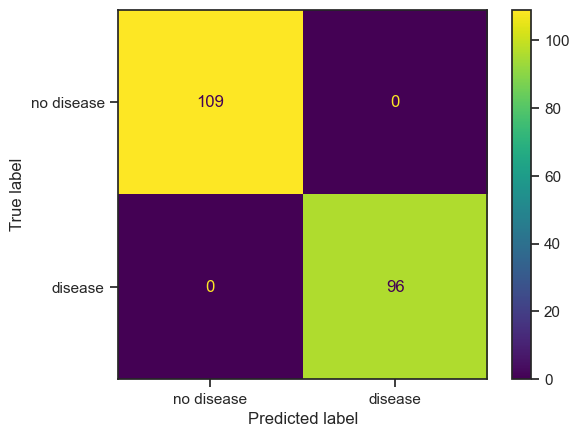

In [15]:
cm3 = confusion_matrix(y_test, y_pred_test_tree, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['no disease', 'disease'])
disp.plot()

In [16]:
# сравнение качества моделей по 2 метрикам
print('LogisticRegression:     ', ac1)
print('SVC:                    ', ac2)
print('DecisionTreeClassifier: ', ac3)

LogisticRegression:      (0.8426829268292683, 0.8048780487804879)
SVC:                     (0.7097560975609756, 0.697560975609756)
DecisionTreeClassifier:  (1.0, 1.0)


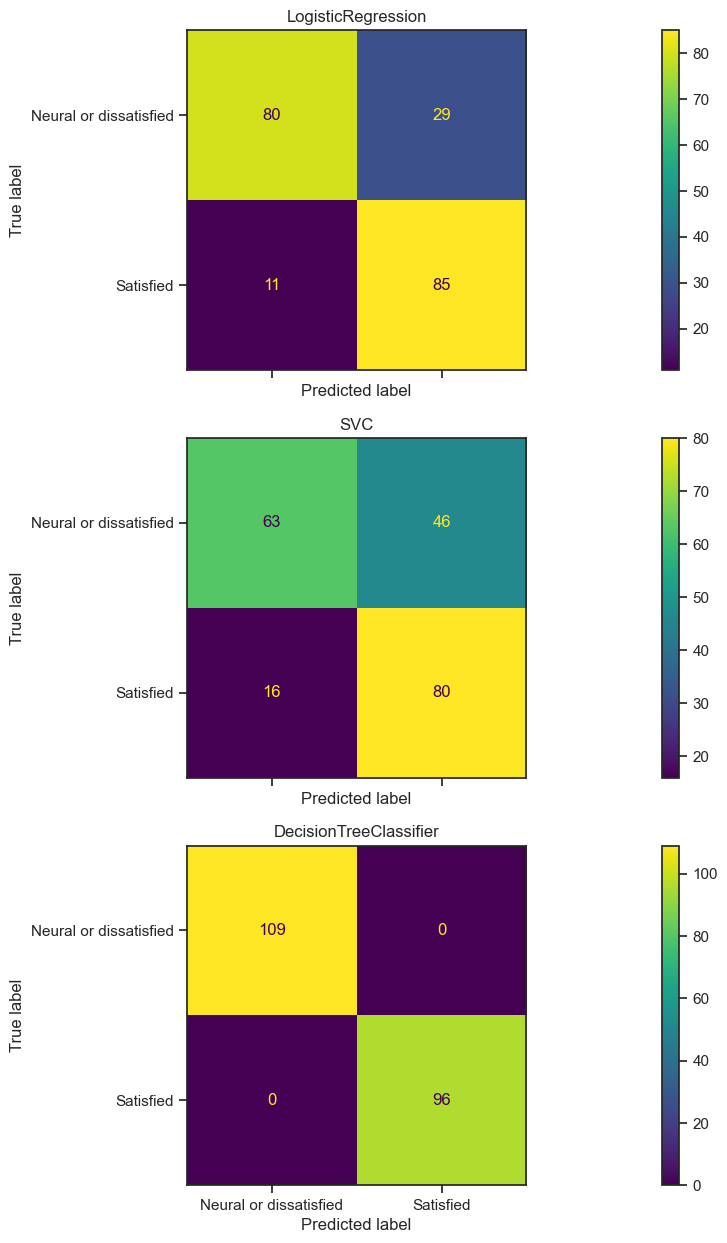

In [17]:
fig, ax = plt.subplots(3,1, sharex='col', sharey='row', figsize=(35,15))
ax[0].set_title("LogisticRegression")
ax[1].set_title("SVC")
ax[2].set_title("DecisionTreeClassifier")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[1])

ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[2])

In [18]:
tree_rules = export_text(tree, feature_names=list(dataset.iloc[:, :-1].columns))
HTML('<pre>' + tree_rules + '</pre>')

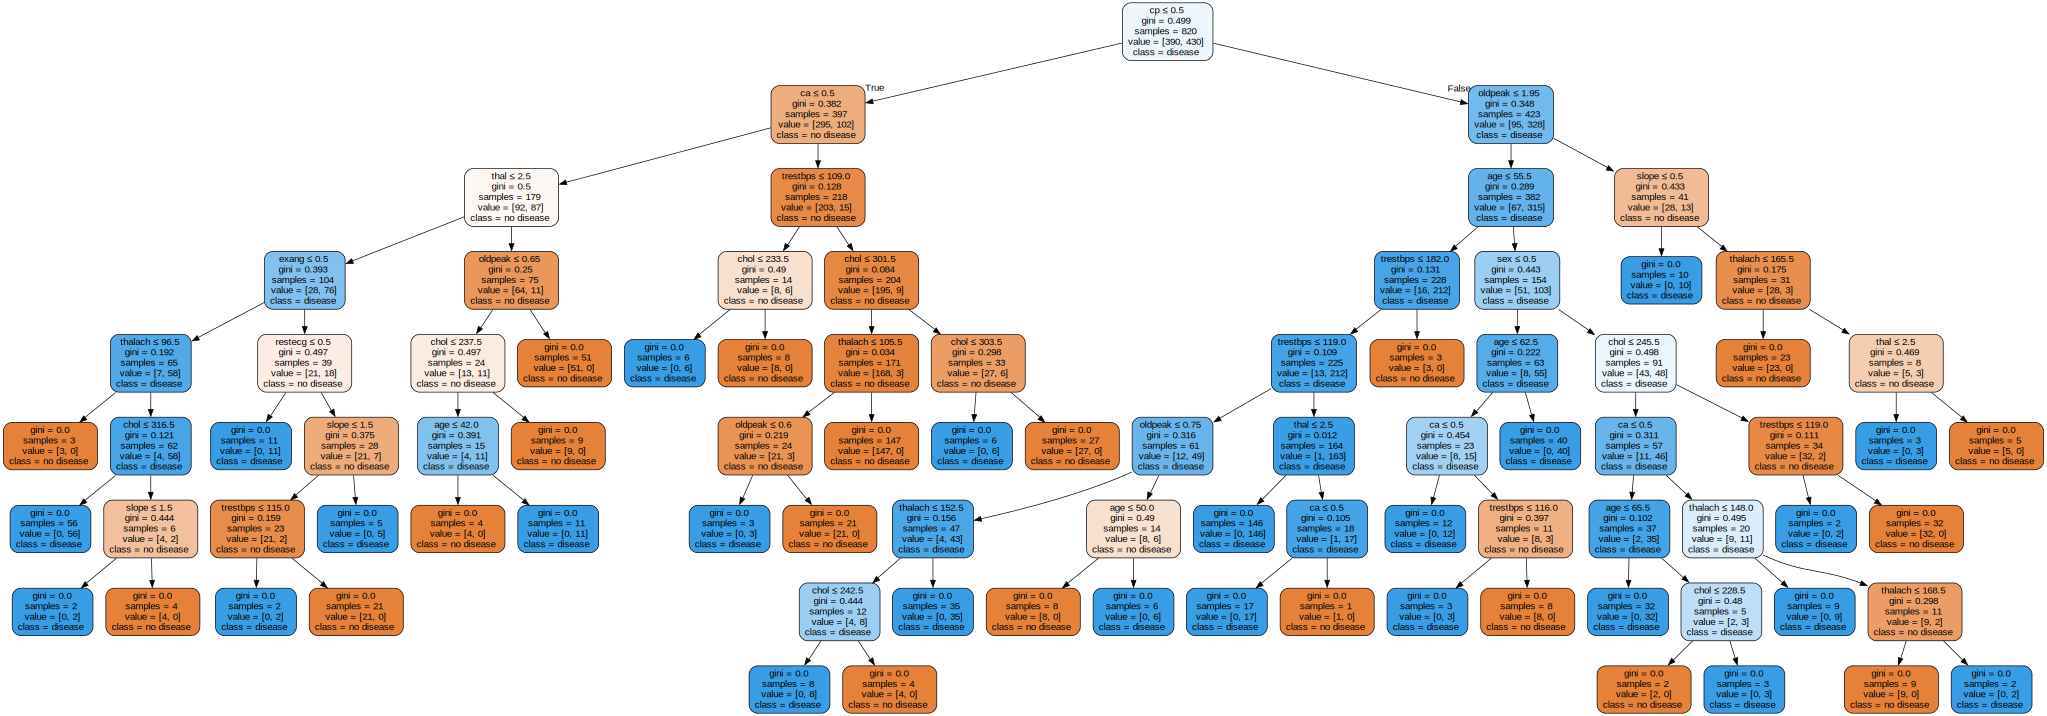

In [19]:
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=dataset.iloc[:, :-1].columns, 
                           class_names=['no disease', 'disease'], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [20]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

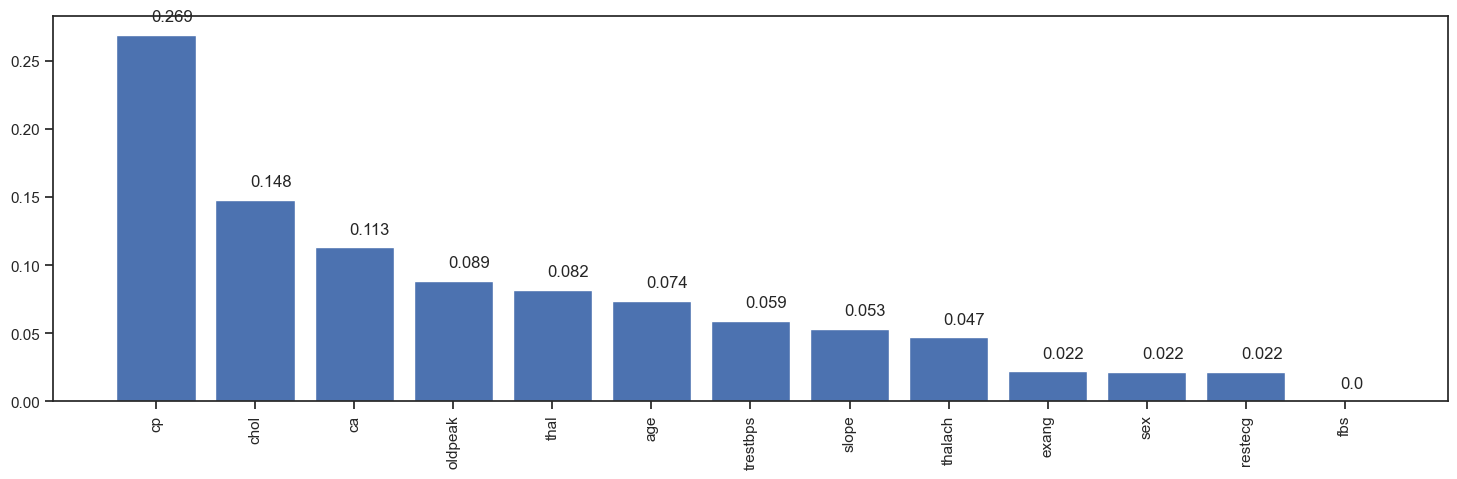

In [21]:
fl, fd = draw_feature_importances(tree, dataset.iloc[:, :-1])